<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#imports" data-toc-modified-id="imports-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>imports</a></span></li><li><span><a href="#build_TE_df_from_gff3" data-toc-modified-id="build_TE_df_from_gff3-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>build_TE_df_from_gff3</a></span></li><li><span><a href="#import-N2-and-CB-gff3-files-and-make-ginormous-df's" data-toc-modified-id="import-N2-and-CB-gff3-files-and-make-ginormous-df's-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>import N2 and CB gff3 files and make ginormous df's</a></span><ul class="toc-item"><li><span><a href="#get-chromosome-lengths" data-toc-modified-id="get-chromosome-lengths-3.1"><span class="toc-item-num">3.1&nbsp;&nbsp;</span>get chromosome lengths</a></span><ul class="toc-item"><li><span><a href="#get_chr_file-(import-chr-file-and-make-df)" data-toc-modified-id="get_chr_file-(import-chr-file-and-make-df)-3.1.1"><span class="toc-item-num">3.1.1&nbsp;&nbsp;</span>get_chr_file (import chr file and make df)</a></span></li><li><span><a href="#fix_chr_names" data-toc-modified-id="fix_chr_names-3.1.2"><span class="toc-item-num">3.1.2&nbsp;&nbsp;</span>fix_chr_names</a></span></li><li><span><a href="#define-chrom-lengths-dfs" data-toc-modified-id="define-chrom-lengths-dfs-3.1.3"><span class="toc-item-num">3.1.3&nbsp;&nbsp;</span>define chrom lengths dfs</a></span></li></ul></li><li><span><a href="#get_relative_positions-(calculate-relative-start-positions-of-transposons-using-chr-lengths-from-chr_df)" data-toc-modified-id="get_relative_positions-(calculate-relative-start-positions-of-transposons-using-chr-lengths-from-chr_df)-3.2"><span class="toc-item-num">3.2&nbsp;&nbsp;</span>get_relative_positions (calculate relative start positions of transposons using chr lengths from chr_df)</a></span></li><li><span><a href="#define-filenames,-generate-dataframes" data-toc-modified-id="define-filenames,-generate-dataframes-3.3"><span class="toc-item-num">3.3&nbsp;&nbsp;</span>define filenames, generate dataframes</a></span></li><li><span><a href="#add-seq-chr-names-and-reindex-according-to-TE-ID" data-toc-modified-id="add-seq-chr-names-and-reindex-according-to-TE-ID-3.4"><span class="toc-item-num">3.4&nbsp;&nbsp;</span>add seq chr names and reindex according to TE ID</a></span></li></ul></li><li><span><a href="#get-SNP-vcf-and-make-it-make-sense" data-toc-modified-id="get-SNP-vcf-and-make-it-make-sense-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>get SNP vcf and make it make sense</a></span><ul class="toc-item"><li><span><a href="#import_sort_vcf" data-toc-modified-id="import_sort_vcf-4.1"><span class="toc-item-num">4.1&nbsp;&nbsp;</span>import_sort_vcf</a></span></li></ul></li><li><span><a href="#find_tes_with_snps" data-toc-modified-id="find_tes_with_snps-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>find_tes_with_snps</a></span></li><li><span><a href="#get_alternate_sequences(N2_dataframe,-teswsnps_dict)" data-toc-modified-id="get_alternate_sequences(N2_dataframe,-teswsnps_dict)-6"><span class="toc-item-num">6&nbsp;&nbsp;</span>get_alternate_sequences(N2_dataframe, teswsnps_dict)</a></span></li><li><span><a href="#look-for-tes-in-cb-reasonaTE-results" data-toc-modified-id="look-for-tes-in-cb-reasonaTE-results-7"><span class="toc-item-num">7&nbsp;&nbsp;</span>look for tes in cb reasonaTE results</a></span><ul class="toc-item"><li><span><a href="#get_CB_te_seq(CB_dataframe)" data-toc-modified-id="get_CB_te_seq(CB_dataframe)-7.1"><span class="toc-item-num">7.1&nbsp;&nbsp;</span>get_CB_te_seq(CB_dataframe)</a></span></li><li><span><a href="#get_matching_unique_tes(alt_seqs_dict,-CB_dataframe)" data-toc-modified-id="get_matching_unique_tes(alt_seqs_dict,-CB_dataframe)-7.2"><span class="toc-item-num">7.2&nbsp;&nbsp;</span>get_matching_unique_tes(alt_seqs_dict, CB_dataframe)</a></span></li></ul></li><li><span><a href="#create_bedtools_dict(intersect_file)" data-toc-modified-id="create_bedtools_dict(intersect_file)-8"><span class="toc-item-num">8&nbsp;&nbsp;</span>create_bedtools_dict(intersect_file)</a></span></li><li><span><a href="#do-the-find" data-toc-modified-id="do-the-find-9"><span class="toc-item-num">9&nbsp;&nbsp;</span>do the find</a></span></li><li><span><a href="#rideogram" data-toc-modified-id="rideogram-10"><span class="toc-item-num">10&nbsp;&nbsp;</span>rideogram</a></span></li><li><span><a href="#percent-with-snps" data-toc-modified-id="percent-with-snps-11"><span class="toc-item-num">11&nbsp;&nbsp;</span>percent with snps</a></span><ul class="toc-item"><li><span><a href="#venn-diagram" data-toc-modified-id="venn-diagram-11.1"><span class="toc-item-num">11.1&nbsp;&nbsp;</span>venn diagram</a></span></li></ul></li></ul></div>

started 2022-06-23 16:22:37 

reindexed TE df according to ID number 2022-06-23 16:44:37 

# imports

In [1]:
from IPython.core.display import display, HTML
from joypy import joyplot
display(HTML("<style>.container { width:100% !important; }</style>"))
from matplotlib import cm
sns.set(style="whitegrid")
from lolviz import *
from Bio import SeqIO
from Bio.Seq import Seq
from matplotlib_venn import venn2, venn2_circles, venn3, venn3_circles
import csv

/var/folders/bz/1k14jvcn01d070lxm_c__h800000gn/T/ipykernel_63881/3926804604.py:1: DeprecationWarning: Importing display from IPython.core.display is deprecated since IPython 7.14, please import from IPython display
  from IPython.core.display import display, HTML


# build_TE_df_from_gff3
import gff3, calculate te sizes and add in seq records, create df, sort df by chr name and then start position

In [2]:
def build_TE_df_from_gff3(gff3_file):
    
    gff_chrom_id = ['seq1', 'seq2', 'seq3', 'seq4', 'seq5', 'seq6']
    chromosomes = ['Chr I', 'Chr II', 'Chr III', 'Chr IV', 'Chr V', 'X Chr']
    
    gff_list = []
    
    with open(gff3_file, newline = '') as lines:                #open gff file, take as tab delimited, create huge list that is the gff file
        line_reader = csv.reader(lines, delimiter='\t')
        for line in line_reader:
                gff_list.append(line)

    gff_data = []
    
    for i in range(len(gff_list)):
        
#         print(i)
        temp = [ gff_list[i][0], int(gff_list[i][3]), int(gff_list[i][4]), gff_list[i][5], gff_list[i][6] ] #chromosome, start, end, score, strand...
        
        id_start = gff_list[i][8].find('=') +1
        id_stop = gff_list[i][8].find(';') 
        te_id = int(gff_list[i][8][id_start:id_stop]) # get TE id
        temp.append(te_id)
        
        size = int(gff_list[i][4]) - int(gff_list[i][3]) ##get TE size (stop_pos - start_pos) 
        temp.append(size)
        
        class_start = gff_list[i][8].find('(') +1
        class_end = gff_list[i][8].find(')')
        class_info = gff_list[i][8][class_start:class_end].split(',') #find transposon class info/descriptions 
        
        if len(class_info) == 3: ##if not a helitron...
            
            family = class_info[0]
            sub_class = class_info[1]
            main_class = class_info[2]


            temp.append(family)
            temp.append(sub_class)
            temp.append(main_class) ##add these three class/ID fields to the temp line
            
        elif len(class_info) == 2: #if a helitron...
            
            family = class_info[0]
            sub_class = '...'
            main_class = class_info[1]


            temp.append(family)
            temp.append(sub_class)
            temp.append(main_class) ##add these three class/ID fields to the temp line
            
        
        gff_data.append(temp) ##append each "line" to data list of lists
      
    gff_df = pd.DataFrame(gff_data, columns=["SeqChr", "Start", "Stop", "Score:Probability", "Strand", 'ID', 'Size', 'Family', 'Subclass', 'Class']) #turn list of lists into dataframe
    
      

    gff_df['Chromosome'] = gff_df['SeqChr']

    
    for i in range(6):
        
        gff_df['Chromosome'] = gff_df['Chromosome'].replace(gff_chrom_id[i], chromosomes[i]) ##replace TransposonUltimate chromosome names with something better
  
        
    gff_df_sorted = gff_df.sort_values(by=['Chromosome', 'Start'], axis=0, ascending=True, ignore_index=True) ##sort by chromosome name first, then starting position within each chromosome, reindex rows...
    
    return gff_df_sorted

# import N2 and CB gff3 files and make ginormous df's
## get chromosome lengths
### get_chr_file (import chr file and make df)

In [3]:
def get_chr_file(chr_lengths_file):
    chr_lines_list = []
    with open(chr_lengths_file) as chr_lines:
        chr_line_reader = csv.reader(chr_lines, delimiter='\t')
        for line in chr_line_reader:
            chr_lines_list.append(line)
            
    N2_chr_list = []
    CB_chr_list = []
    for i in range(len(chr_lines_list)):
        
        if chr_lines_list[i][0] == 'Chr':
            continue
            
        elif chr_lines_list[i][3] == 'Libuda N2':
            chr_lines_list[i][2] = int(chr_lines_list[i][2])
            N2_chr_list.append(chr_lines_list[i])
            
        elif chr_lines_list[i][3] == 'Libuda CB':
            chr_lines_list[i][2] = int(chr_lines_list[i][2])
            CB_chr_list.append(chr_lines_list[i])
            
            
    N2_chr_df = pd.DataFrame(N2_chr_list, columns = ['chr', 'start', 'end', 'strain'])

    CB_chr_df = pd.DataFrame(CB_chr_list, columns = ['chr', 'start', 'end', 'strain'])
            
    return N2_chr_df, CB_chr_df, N2_chr_list

### fix_chr_names

In [4]:
def fix_chr_names(dataframe):
    for index, row in dataframe.iterrows():
        if dataframe.at[index, 'chr'] == 'I':
            dataframe.at[index, 'chr'] = 'Chr I'
        elif dataframe.at[index, 'chr'] == 'II':
            dataframe.at[index, 'chr'] = 'Chr II'
        elif dataframe.at[index, 'chr'] == 'III':
            dataframe.at[index, 'chr'] = 'Chr III'
        elif dataframe.at[index, 'chr'] == 'IV':
            dataframe.at[index, 'chr'] = 'Chr IV'
        elif dataframe.at[index, 'chr'] == 'V':
            dataframe.at[index, 'chr'] = 'Chr V'
        elif dataframe.at[index, 'chr'] == 'X':
            dataframe.at[index, 'chr'] = 'X Chr'


### define chrom lengths dfs

## get_relative_positions (calculate relative start positions of transposons using chr lengths from chr_df)

In [5]:
def get_relative_positions(all_df, chr_df):
    for index, row in all_df.iterrows():
        for cindex, crow in chr_df.iterrows():
            if all_df.at[index, 'Chromosome'] == chr_df.at[cindex, 'chr']: # if the same chr
                all_df.at[index, 'Relative Start Position'] = int(all_df.at[index, 'Start']) / int(chr_df.at[cindex, 'end']) # relative start position = start position / chromosome length



## define filenames, generate dataframes
dataframe names:\
N2_all_df, CB_all_df (all tes)\
N2_dna_tes, CB_dna_tes (only DNA (class II) tes)\
N2_retro_tes, CB_retro_tes (only retro (class I) tes

## add seq chr names and reindex according to TE ID

In [6]:
# from detect analysis notebook
# assign seqio records to each TE so that you can get the sequence of the TE later

libN2_fasta = '/Users/coraalbers/Desktop/labfiles/reasonaTE_N2_out_final/N2_sequence.fasta'
libCB_fasta = '/Users/coraalbers/Desktop/labfiles/reasonaTE_CB_out_final/CB_sequence.fasta'

def assign_sequence(fasta_file, dataframe, column_name):
    
    gen = ['']*len(dataframe.Start)
    dataframe[column_name] = gen


    for record in SeqIO.parse(fasta_file, "fasta"):

        print(record.id) #sanity chek

        for index, row in dataframe.iterrows():

            if dataframe.at[index, 'SeqChr'] == str(record.id):
                
                dataframe.at[index, column_name] = record
    
    dataframe2 = dataframe.set_index('ID')
                
    return dataframe2



# get SNP vcf and make it make sense
## import_sort_vcf
+ import the vcf file and turn each line into a list in a larger list
+ sort vcf, change chr names to same ones as gff and then make it into a dataframe

In [7]:
def import_sort_vcf(filename): #import vcf will import the vcf file and turn each line into a list in a larger list
    with open(filename) as f:
        lines = f.readlines()
        
        lines_list = []
        for line in lines: 
            line_list = line.split('\t')
            lines_list.append(line_list)
            
            
    header_lines_list = []
    info_lines_list = []
    
    for indiv_line in lines_list:
#         indiv_line = lines_list[i]
        if indiv_line[0][0] != '#':
            info_lines_list.append(indiv_line[0:5])
        else:
            header_lines_list.append(indiv_line)
    
            
    snp_df = pd.DataFrame(info_lines_list, columns = ['Chromosome', 'Position', 'blank', 'N2 Reference', 'CB Alternate'])
    snp_df = snp_df.reindex(columns = ['Chromosome', 'Position', 'N2 Reference', 'CB Alternate'])
    
    for index, row in snp_df.iterrows():
        if snp_df.at[index, 'Chromosome'] == 'N2_chrI':
            snp_df.at[index, 'Chromosome'] = 'Chr I'
        elif snp_df.at[index, 'Chromosome'] == 'N2_chrII':
            snp_df.at[index, 'Chromosome'] = 'Chr II'
        elif snp_df.at[index, 'Chromosome'] == 'N2_chrIII':
            snp_df.at[index, 'Chromosome'] = 'Chr III'
        elif snp_df.at[index, 'Chromosome'] == 'N2_chrIV':
            snp_df.at[index, 'Chromosome'] = 'Chr IV'
        elif snp_df.at[index, 'Chromosome'] == 'N2_chrV':
            snp_df.at[index, 'Chromosome'] = 'Chr V'
        elif snp_df.at[index, 'Chromosome'] == 'N2_chrX':
            snp_df.at[index, 'Chromosome'] = 'X Chr'
    
    return snp_df    
        
            
    
            

# find_tes_with_snps

In [9]:
def find_tes_with_snps(genome_df, snp_df):

    tes_snps_dict = {}
    
    count = 0

    for te_index, te_row in genome_df.iterrows(): # for each TE
        
        count += 1
        print(count)

        range_start = int(genome_df.at[te_index, 'Start'])     # create position range that is the TE
        range_stop = int(genome_df.at[te_index, 'Stop'])

        te_chr = genome_df.at[te_index, 'Chromosome'] # get the chromosome the TE is on

        print(f'chr = {te_chr}, start:{range_start}, stop:{range_stop}')

        indiv_te_snps = [] # create blank list that will store SNPs within this TE

        snp_spec_chr_df = snp_df[snp_df['Chromosome'] == te_chr] # make a smaller genome_df of SNPs that has only the SNPs that are on the same chromosome as the TE under fire

        for snp_index, snp_row in snp_spec_chr_df.iterrows():

            if int(snp_spec_chr_df.at[snp_index, 'Position']) in range(range_start, range_stop): # is the SNP's position is in the position range of the TE

                indiv_snp = snp_spec_chr_df.loc[snp_index].values.tolist() # make the SNP genome_df row into a values list

                print(indiv_snp)

                indiv_te_snps.append(indiv_snp) # add the SNP info list to the list of SNPs for the TE under investigation

            else:
                pass

        tes_snps_dict[int(te_index)] = indiv_te_snps # create entry in tes_snps_dict with TE ID as key and list of SNPS as value {te_id: [snp1, snp2, ...]}
        
    tes_with_snps = {key:val for key, val in tes_snps_dict.items() if val != []}    # takes TEs without any SNPs out of dict (they have blank list values)

    return tes_with_snps



# get_alternate_sequences(N2_dataframe, teswsnps_dict)

In [8]:
def get_alternate_sequences(N2_dataframe, teswsnps_dict):
    
    alt_seqs = {}
    

    for te_id, value in teswsnps_dict.items(): # for each TE that has SNPs (each TE in the dictionary returned from find_tes_with_snps)
        
        sequence_record = N2_dataframe.loc[te_id, 'N2 record']

        chr_seq = str(sequence_record.seq) # get chromosome sequence

        te_start = int(N2_dataframe.loc[te_id, 'Start']) # get TE start and stop coords
        
        te_stop = int(N2_dataframe.loc[te_id, 'Stop'])

        N2_te_seq = (chr_seq[te_start-1 : te_stop-1])

        CB_seq = N2_te_seq # create CB sequence variable

        for i in range(len(value)):

            snp_pos = int(value[i][1]) # get snp position
            alt_pos = (snp_pos - te_start) # get position of snp relative to short te sequence

            # need to always get first snp, can't go by 0th index because there are some rando ones that are sequences and not just one letter
            if len(value[i][3]) == 1:
                snp_alt_allele = value[i][3][0] # get alternate allele if there is only one available
            elif len(value[i][3]) > 1:
                alt_allele_list = value[i][3].split(',') # if a sequence or more than one allele option, split the options at the comma and get the first one
                snp_alt_allele = alt_allele_list[0]

            CB_seq = CB_seq[:alt_pos] + str(snp_alt_allele) + CB_seq[alt_pos+1:] #replace reference allele with alternate allele and leave the rest of the TE sequence intact

        alt_seqs[te_id] = CB_seq

    return alt_seqs


# look for tes in cb reasonaTE results

## get_CB_te_seq(CB_dataframe)

<span class="mark">only have to run once</span>

In [9]:
def get_CB_te_seq(CB_dataframe):
    
    df_length = ['']*len(CB_dataframe.Start)
    CB_dataframe['CB TE seq'] = df_length

    for index, row in CB_dataframe.iterrows():

        cb_record = CB_dataframe.at[index, 'CB record']

        start_pos = int(CB_dataframe.at[index, 'Start']) - 1 # get CB TE start and stop positions, and convert to coords that get correct sequence from seq record (because 1 -> 0 base)
        stop_pos = int(CB_dataframe.at[index, 'Stop']) - 1


        cb_chr_seq = str(cb_record.seq) # convert chromosome sequence to string
        cb_te_seq = cb_chr_seq[start_pos:stop_pos] # get TE sequence from chromosome string using start and stop coords

        CB_dataframe.at[index, 'CB TE seq'] = cb_te_seq


    return CB_dataframe


## get_matching_unique_tes(alt_seqs_dict, CB_dataframe)

In [10]:
def get_matching_unique_tes(alt_seqs_dict, CB_dataframe):
    
    with open('matching_tes.tsv', 'wt') as out_file:
        tsv_writer = csv.writer(out_file, delimiter='\t')
        
        matching_list = []

        for n2_te_id, alt_seq in alt_seqs_dict.items(): # for each unique TE
            
#             print(n2_te_id, alt_seq)

            if alt_seq in CB_dataframe['CB TE seq'].values.tolist(): # if the sequence was found by reasonaTE in CB

                cb_te_id = (CB_dataframe[CB_dataframe['CB TE seq'] == alt_seq].index.values) # get the CB TE id from reasonaTE results

                matching_list.append([n2_te_id, cb_te_id])

                print('N2 ID: ', n2_te_id, 'CB ID: ', cb_te_id)
                
                tsv_writer.writerow([n2_te_id, cb_te_id])

    return matching_list



    
   

# create_bedtools_dict(intersect_file)

In [11]:
def create_bedtools_dict(intersect_file):

    with open(intersect_file) as f:
        lines = f.readlines()

        lines_list = []
        for line in lines: 
            line1 = line.split('\t')
            lines_list.append(line1)
    
    df_list = []
    for i in range(len(lines_list)):
        chrom = lines_list[i][0]

        if chrom == 'seq1':
            chrom = 'Chr I'
        elif chrom == 'seq2':
            chrom = 'Chr II'
        elif chrom == 'seq3':
            chrom = 'Chr III'
        elif chrom == 'seq4':
            chrom = 'Chr IV'
        elif chrom == 'seq5':
            chrom = 'Chr V'
        elif chrom == 'seq6':
            chrom = 'X Chr'

        id_start = lines_list[i][8].find('=') +1
        id_stop = lines_list[i][8].find(';') 
        te_id = int(lines_list[i][8][id_start:id_stop]) # get TE id

        position = lines_list[i][10]

        reference = lines_list[i][12]
        alternate = lines_list[i][13]

        df_list.append([te_id, [chrom, position, reference, alternate]])

    tes_with_snps_df = pd.DataFrame(df_list, columns = ['id', 'snps'])   
    
    tes_with_snps_df = tes_with_snps_df.groupby(['id']).agg(tuple).applymap(list).reset_index()
    
    tes_with_snps_dict = dict(zip(tes_with_snps_df.id, tes_with_snps_df.snps))
    
    return [tes_with_snps_dict, tes_with_snps_df]


# do the find

In [12]:
intersect_file = '/Users/coraalbers/Desktop/labfiles/find_unique_TEs_TEUlt/N2_filter2_snps_in_tes.txt'

tes_with_snps_list = create_bedtools_dict(intersect_file)
tes_with_snps_dict = tes_with_snps_list[0]
tes_with_snps_df = tes_with_snps_list[1]
print((tes_with_snps_df))

         id                                               snps
0         1  [[Chr I, 134132, A, T], [Chr I, 134356, T, G],...
1         2  [[Chr I, 272913, T, A], [Chr I, 274025, A, T],...
2         3  [[Chr I, 520878, C, G], [Chr I, 522107, A, G],...
3         4                            [[Chr I, 571368, T, A]]
4         5  [[Chr I, 673153, T, C], [Chr I, 673337, C, T],...
...     ...                                                ...
9345  40878                          [[X Chr, 17314649, A, T]]
9346  40883                          [[X Chr, 17327860, A, G]]
9347  40885  [[X Chr, 17332657, G, A], [X Chr, 17332662, T,...
9348  40887                          [[X Chr, 17475117, G, A]]
9349  40895  [[X Chr, 17662336, C, T], [X Chr, 17662345, A,...

[9350 rows x 2 columns]


In [13]:
chr_lengths_file = '/Users/coraalbers/Desktop/labfiles/chr_lengths.txt'

N2_chr_df = get_chr_file(chr_lengths_file)[0]
CB_chr_df = get_chr_file(chr_lengths_file)[1]

fix_chr_names(N2_chr_df)
fix_chr_names(CB_chr_df)

In [14]:
N2_chr_df

,chr,start,end,strain
0,Chr I,1,15114068,Libuda N2
1,Chr II,1,15311845,Libuda N2
2,Chr III,1,13819453,Libuda N2
3,Chr IV,1,17493838,Libuda N2
4,Chr V,1,20953657,Libuda N2
5,X Chr,1,17739129,Libuda N2


In [15]:
N2_file = '/Users/coraalbers/Desktop/labfiles/reasonaTE_analysis_LTRRet/N2_filter2.gff3'
CB_file = '/Users/coraalbers/Desktop/labfiles/reasonaTE_analysis_LTRRet/CB_filter2.gff3'

N2_all_df = build_TE_df_from_gff3(N2_file)
CB_all_df = build_TE_df_from_gff3(CB_file)

get_relative_positions(N2_all_df, N2_chr_df)
get_relative_positions(CB_all_df, CB_chr_df)

N2_all_df = assign_sequence(libN2_fasta, N2_all_df, 'N2 record')
CB_all_df = assign_sequence(libCB_fasta, CB_all_df, 'CB record')

seq1
seq2
seq3
seq4
seq5
seq6
seq1
seq2
seq3
seq4
seq5
seq6


In [16]:
vcf_file = '/Users/coraalbers/Desktop/labfiles/find_unique_TES/CB.aligned.to.N2.SNPs.final.vcf'

snp_df = import_sort_vcf(vcf_file)

In [17]:
alt_seqs_dict = get_alternate_sequences(N2_all_df, tes_with_snps_dict)

In [18]:
CB_all_df = get_CB_te_seq(CB_all_df)

In [19]:
matching_list = get_matching_unique_tes(alt_seqs_dict, CB_all_df)
print(len(matching_list))

N2 ID:  4 CB ID:  [3]
N2 ID:  19 CB ID:  [19]
N2 ID:  41 CB ID:  [40]
N2 ID:  69 CB ID:  [67]
N2 ID:  79 CB ID:  [77]
N2 ID:  103 CB ID:  [102]
N2 ID:  113 CB ID:  [112]
N2 ID:  115 CB ID:  [114]
N2 ID:  123 CB ID:  [122]
N2 ID:  146 CB ID:  [148 151]
N2 ID:  151 CB ID:  [156]
N2 ID:  178 CB ID:  [182]
N2 ID:  201 CB ID:  [203]
N2 ID:  243 CB ID:  [240]
N2 ID:  244 CB ID:  [241]
N2 ID:  250 CB ID:  [246]
N2 ID:  286 CB ID:  [283]
N2 ID:  287 CB ID:  [284]
N2 ID:  306 CB ID:  [304]
N2 ID:  307 CB ID:  [305]
N2 ID:  341 CB ID:  [333]
N2 ID:  354 CB ID:  [346]
N2 ID:  362 CB ID:  [354]
N2 ID:  396 CB ID:  [381]
N2 ID:  411 CB ID:  [395]
N2 ID:  415 CB ID:  [398]
N2 ID:  423 CB ID:  [406]
N2 ID:  434 CB ID:  [417]
N2 ID:  436 CB ID:  [419]
N2 ID:  447 CB ID:  [429]
N2 ID:  449 CB ID:  [431]
N2 ID:  464 CB ID:  [444]
N2 ID:  490 CB ID:  [473]
N2 ID:  503 CB ID:  [484]
N2 ID:  509 CB ID:  [489]
N2 ID:  511 CB ID:  [491]
N2 ID:  524 CB ID:  [505]
N2 ID:  526 CB ID:  [507]
N2 ID:  541 CB ID:  

N2 ID:  2035 CB ID:  [1971]
N2 ID:  2038 CB ID:  [1974]
N2 ID:  2050 CB ID:  [1991]
N2 ID:  2062 CB ID:  [2036]
N2 ID:  2064 CB ID:  [1998]
N2 ID:  2069 CB ID:  [2002]
N2 ID:  2071 CB ID:  [2004]
N2 ID:  2073 CB ID:  [2006]
N2 ID:  2097 CB ID:  [2030]
N2 ID:  2101 CB ID:  [2033]
N2 ID:  2102 CB ID:  [2034]
N2 ID:  2104 CB ID:  [1997]
N2 ID:  2115 CB ID:  [2012]
N2 ID:  2117 CB ID:  [2015]
N2 ID:  2121 CB ID:  [2038]
N2 ID:  2123 CB ID:  [2042]
N2 ID:  2124 CB ID:  [2041]
N2 ID:  2128 CB ID:  [2117]
N2 ID:  2129 CB ID:  [2116]
N2 ID:  2133 CB ID:  [2045]
N2 ID:  2135 CB ID:  [2113]
N2 ID:  2137 CB ID:  [2081]
N2 ID:  2140 CB ID:  [2084]
N2 ID:  2143 CB ID:  [2282]
N2 ID:  2147 CB ID:  [2085]
N2 ID:  2148 CB ID:  [2110]
N2 ID:  2152 CB ID:  [2087]
N2 ID:  2158 CB ID:  [2094]
N2 ID:  2159 CB ID:  [2093]
N2 ID:  2160 CB ID:  [2096]
N2 ID:  2172 CB ID:  [2105]
N2 ID:  2173 CB ID:  [2107]
N2 ID:  2186 CB ID:  [2121]
N2 ID:  2193 CB ID:  [2163 2164]
N2 ID:  2198 CB ID:  [2159]
N2 ID:  2201 CB

N2 ID:  6610 CB ID:  [6641]
N2 ID:  6622 CB ID:  [6658]
N2 ID:  6650 CB ID:  [6534]
N2 ID:  6735 CB ID:  [4593]
N2 ID:  6775 CB ID:  [6507]
N2 ID:  6781 CB ID:  [6784]
N2 ID:  6782 CB ID:  [6785]
N2 ID:  6816 CB ID:  [6842]
N2 ID:  6819 CB ID:  [6840]
N2 ID:  6872 CB ID:  [7303]
N2 ID:  6889 CB ID:  [6755]
N2 ID:  6891 CB ID:  [6756]
N2 ID:  7068 CB ID:  [7053]
N2 ID:  7089 CB ID:  [6968]
N2 ID:  7214 CB ID:  [7064]
N2 ID:  7216 CB ID:  [7078]
N2 ID:  7221 CB ID:  [7020]
N2 ID:  7325 CB ID:  [7444]
N2 ID:  7462 CB ID:  [7344]
N2 ID:  7503 CB ID:  [7470]
N2 ID:  28725 CB ID:  [28538]
N2 ID:  28728 CB ID:  [28542]
N2 ID:  28729 CB ID:  [28543]
N2 ID:  28740 CB ID:  [28554]
N2 ID:  28747 CB ID:  [28560]
N2 ID:  28750 CB ID:  [28563]
N2 ID:  28763 CB ID:  [28575]
N2 ID:  28779 CB ID:  [28589]
N2 ID:  28780 CB ID:  [28590]
N2 ID:  28793 CB ID:  [28602]
N2 ID:  28798 CB ID:  [28606]
N2 ID:  28805 CB ID:  [28614]
N2 ID:  28808 CB ID:  [28617]
N2 ID:  28810 CB ID:  [28619]
N2 ID:  28813 CB ID:

N2 ID:  30877 CB ID:  [30646]
N2 ID:  30881 CB ID:  [30647]
N2 ID:  30885 CB ID:  [30655]
N2 ID:  30892 CB ID:  [30654]
N2 ID:  30897 CB ID:  [30664]
N2 ID:  30925 CB ID:  [30685]
N2 ID:  30926 CB ID:  [30686]
N2 ID:  30930 CB ID:  [30691]
N2 ID:  30931 CB ID:  [30692]
N2 ID:  30935 CB ID:  [30697]
N2 ID:  30942 CB ID:  [30701]
N2 ID:  30958 CB ID:  [30721]
N2 ID:  30976 CB ID:  [30738]
N2 ID:  30981 CB ID:  [30743]
N2 ID:  30989 CB ID:  [30750]
N2 ID:  31001 CB ID:  [30761]
N2 ID:  31003 CB ID:  [30763]
N2 ID:  31011 CB ID:  [30774]
N2 ID:  31015 CB ID:  [30775]
N2 ID:  31045 CB ID:  [30802]
N2 ID:  31052 CB ID:  [30807]
N2 ID:  31064 CB ID:  [30819]
N2 ID:  31081 CB ID:  [30836]
N2 ID:  31086 CB ID:  [30840]
N2 ID:  31094 CB ID:  [30850]
N2 ID:  31107 CB ID:  [30860]
N2 ID:  31147 CB ID:  [30907]
N2 ID:  31148 CB ID:  [30903]
N2 ID:  31194 CB ID:  [30952]
N2 ID:  31201 CB ID:  [30961]
N2 ID:  31206 CB ID:  [30964]
N2 ID:  31215 CB ID:  [30971]
N2 ID:  31241 CB ID:  [30999]
N2 ID:  31

N2 ID:  33772 CB ID:  [33385]
N2 ID:  33778 CB ID:  [33391]
N2 ID:  33780 CB ID:  [33393]
N2 ID:  33797 CB ID:  [33411]
N2 ID:  33804 CB ID:  [33419]
N2 ID:  33812 CB ID:  [33426]
N2 ID:  33813 CB ID:  [33427]
N2 ID:  33821 CB ID:  [33435]
N2 ID:  33822 CB ID:  [33436]
N2 ID:  33833 CB ID:  [33448]
N2 ID:  33879 CB ID:  [33486]
N2 ID:  33906 CB ID:  [33513]
N2 ID:  33908 CB ID:  [33514]
N2 ID:  33936 CB ID:  [33550]
N2 ID:  33937 CB ID:  [33551]
N2 ID:  33955 CB ID:  [33566]
N2 ID:  33962 CB ID:  [33576]
N2 ID:  33970 CB ID:  [33584]
N2 ID:  33972 CB ID:  [33586]
N2 ID:  33977 CB ID:  [33589]
N2 ID:  33978 CB ID:  [33590]
N2 ID:  33982 CB ID:  [33594]
N2 ID:  34000 CB ID:  [33611]
N2 ID:  34005 CB ID:  [33614]
N2 ID:  34020 CB ID:  [692]
N2 ID:  34038 CB ID:  [33648]
N2 ID:  34049 CB ID:  [33657]
N2 ID:  34066 CB ID:  [33671]
N2 ID:  34084 CB ID:  [33689]
N2 ID:  34088 CB ID:  [33696]
N2 ID:  34090 CB ID:  [33700]
N2 ID:  34096 CB ID:  [33713]
N2 ID:  34128 CB ID:  [33743]
N2 ID:  3416

N2 ID:  40088 CB ID:  [39481]
N2 ID:  40122 CB ID:  [39519]
N2 ID:  40181 CB ID:  [39606]
N2 ID:  40205 CB ID:  [39630]
N2 ID:  40222 CB ID:  [39645]
N2 ID:  40260 CB ID:  [39717]
N2 ID:  40336 CB ID:  [39792]
N2 ID:  40476 CB ID:  [39879]
N2 ID:  40495 CB ID:  [39898]
N2 ID:  40525 CB ID:  [39916]
N2 ID:  40538 CB ID:  [39946]
N2 ID:  40543 CB ID:  [39953]
N2 ID:  40555 CB ID:  [39967]
N2 ID:  40570 CB ID:  [39984]
N2 ID:  40573 CB ID:  [39987]
N2 ID:  40574 CB ID:  [39988]
N2 ID:  40581 CB ID:  [39994]
N2 ID:  40611 CB ID:  [40028]
N2 ID:  40633 CB ID:  [40053]
N2 ID:  40644 CB ID:  [40061]
N2 ID:  40654 CB ID:  [40071]
N2 ID:  40657 CB ID:  [40073]
N2 ID:  40667 CB ID:  [40078]
N2 ID:  40673 CB ID:  [40086]
N2 ID:  40675 CB ID:  [40088]
N2 ID:  40681 CB ID:  [40096]
N2 ID:  40697 CB ID:  [40110]
N2 ID:  40730 CB ID:  [40148]
N2 ID:  40757 CB ID:  [40168]
N2 ID:  40768 CB ID:  [40177]
N2 ID:  40794 CB ID:  [40200]
N2 ID:  40804 CB ID:  [40209]
N2 ID:  40805 CB ID:  [40210]
N2 ID:  40

In [20]:
matching_list2 = matching_list.copy()

In [21]:
for i in range(len(matching_list2)):
    
    matching_list2[i][1] = matching_list2[i][1].tolist()
    temp = [int(item) for item in matching_list2[i][1]]
    matching_list2[i][1] = temp
    
    if len(matching_list2[i][1]) > 1:  # creates entry for every cb copy (ex. if there are 2 copies of alternate sequence from 1 n2 id, there will be 2 entries -> one for each cb copy)
        
        copies = matching_list2[i][1]
        print(matching_list2[i])
                
        matching_list2[i][1] = copies[0]
                    
        matching_list2.append([int(matching_list2[i][0]), int(copies[1])])
            
        
    else:
        matching_list2[i][1] = matching_list2[i][1][0]
            
    
#     for j in range(len(matching_list2[i][1])): # converts each cb id value into integer
        
#         matching_list2[i][1][j] = int(matching_list2[i][1][j])

[146, [148, 151]]
[1251, [1234, 1235]]
[1773, [1753, 1752]]
[1795, [1789, 1790]]
[2193, [2163, 2164]]
[2324, [2288, 2844]]
[2457, [675, 2414]]
[4243, [4385, 4390]]
[5404, [5300, 5301]]
[5406, [5302, 5303]]
[28997, [28803, 28804]]
[29831, [29612, 29615]]
[32119, [31823, 31830]]
[32462, [32145, 32150]]
[36059, [35780, 35898]]
[36950, [36595, 36606]]
[36956, [36603, 36614]]
[37125, [36654, 36684]]
[37130, [36658, 36688]]
[37210, [36846, 36859]]
[37260, [36846, 36859]]
[38442, [37865, 37868]]
[38458, [37883, 38851]]


In [22]:
matching_list2

matching_df = pd.DataFrame(matching_list2, columns = ['N2_id', 'CB_id'])
matching_df

,N2_id,CB_id
0,4,3
1,19,19
2,41,40
3,69,67
4,79,77
...,...,...
1527,37130,36688
1528,37210,36859
1529,37260,36859
1530,38442,37868


# rideogram

rideogram synteny format \
Species_1 \t Start_1 \t End_1 \t Species_2 \t Start_2 \t End_2 \t fill \
\
N2 chr \t n2 start \t n2 stop \t CB chr \t cb start \t cb stop \t fill

In [29]:
matching_tsv_list = []
for index, row in matching_df.iterrows():
    n2_id = int(row['N2_id'])
    cb_id = (row['CB_id'])
    
    if N2_all_df.at[n2_id, 'Class'] != 'Retrotransposon':
        
        n2_chrom = (N2_all_df.at[n2_id, 'SeqChr'])
        cb_chrom = (CB_all_df.at[cb_id, 'SeqChr'])

        if n2_chrom == 'seq1':
            n2_chrom = '1'
        elif n2_chrom == 'seq2':
            n2_chrom ='2'
        elif n2_chrom == 'seq3':
            n2_chrom = '3'
        elif n2_chrom == 'seq4':
            n2_chrom = '4'
        elif n2_chrom == 'seq5':
            n2_chrom = '5'
        elif n2_chrom == 'seq6':
            n2_chrom = '6'
            
        if cb_chrom == 'seq1':
            cb_chrom = '1'
        elif cb_chrom == 'seq2':
            cb_chrom = '2'
        elif cb_chrom == 'seq3':
            cb_chrom = '3'
        elif cb_chrom == 'seq4':
            cb_chrom = '4'
        elif cb_chrom == 'seq5':
            cb_chrom = '5'
        elif cb_chrom == 'seq6':
            cb_chrom = '6'
    
        
        n2_start = int(N2_all_df.at[n2_id, 'Start'])
        n2_stop = int(N2_all_df.at[n2_id, 'Stop'])

        cb_start = int(CB_all_df.at[cb_id, 'Start'])
        cb_stop = int(CB_all_df.at[cb_id, 'Stop'])

        color = '595959'

        line = [ n2_chrom, n2_start, n2_stop, cb_chrom, cb_start, cb_stop, color]
        matching_tsv_list.append(line)

    
matching_tsv_df = pd.DataFrame(matching_tsv_list, columns = [ 'n2_chrom', 'n2_start', 'n2_stop',  'cb_chrom', 'cb_start', 'cb_stop', 'color'])    
# matching_tsv_df.to_csv("TEUlt_dna_matching_LTRRet_filter2.tsv", sep="\t", index=False)

In [32]:
matching_tsv_list = []
for index, row in matching_df.iterrows():
    n2_id = int(row['N2_id'])
    cb_id = (row['CB_id'])
    
    if N2_all_df.at[n2_id, 'Class'] != 'Retrotransposon':
    
        n2_chrom = (N2_all_df.at[n2_id, 'SeqChr'])
        cb_chrom = (CB_all_df.at[cb_id, 'SeqChr'])
        
        if n2_chrom == 'seq1':
            n2_chrom = '1'
        elif n2_chrom == 'seq2':
            n2_chrom ='2'
        elif n2_chrom == 'seq3':
            n2_chrom = '3'
        elif n2_chrom == 'seq4':
            n2_chrom = '4'
        elif n2_chrom == 'seq5':
            n2_chrom = '5'
        elif n2_chrom == 'seq6':
            n2_chrom = '6'
            
        if cb_chrom == 'seq1':
            cb_chrom = '1'
        elif cb_chrom == 'seq2':
            cb_chrom = '2'
        elif cb_chrom == 'seq3':
            cb_chrom = '3'
        elif cb_chrom == 'seq4':
            cb_chrom = '4'
        elif cb_chrom == 'seq5':
            cb_chrom = '5'
        elif cb_chrom == 'seq6':
            cb_chrom = '6'

        n2_start = int(N2_all_df.at[n2_id, 'Start'])
        n2_stop = int(N2_all_df.at[n2_id, 'Stop'])

        cb_start = int(CB_all_df.at[cb_id, 'Start'])
        cb_stop = int(CB_all_df.at[cb_id, 'Stop'])

        color = '595959'

        line = [n2_id, n2_chrom, n2_start, n2_stop, cb_id, cb_chrom, cb_start, cb_stop, color]
        matching_tsv_list.append(line)

    
matching_tsv_withids_df = pd.DataFrame(matching_tsv_list, columns = ['n2_id', 'n2_chrom', 'n2_start', 'n2_stop', 'cb_id', 'cb_chrom', 'cb_start', 'cb_stop', 'color'])    


added ids into dataframe to track them, but can just take out if have to remake tsv's for any reason ↑

In [27]:
matching_tsv_list = []
for index, row in matching_df.iterrows():
    n2_id = int(row['N2_id'])
    cb_id = (row['CB_id'])
    
    
    n2_chrom = (N2_all_df.at[n2_id, 'SeqChr'])
    cb_chrom = (CB_all_df.at[cb_id, 'SeqChr'])

    if n2_chrom == 'seq1':
        n2_chrom = '1'
    elif n2_chrom == 'seq2':
        n2_chrom ='2'
    elif n2_chrom == 'seq3':
        n2_chrom = '3'
    elif n2_chrom == 'seq4':
        n2_chrom = '4'
    elif n2_chrom == 'seq5':
        n2_chrom = '5'
    elif n2_chrom == 'seq6':
        n2_chrom = '6'

    if cb_chrom == 'seq1':
        cb_chrom = '1'
    elif cb_chrom == 'seq2':
        cb_chrom = '2'
    elif cb_chrom == 'seq3':
        cb_chrom = '3'
    elif cb_chrom == 'seq4':
        cb_chrom = '4'
    elif cb_chrom == 'seq5':
        cb_chrom = '5'
    elif cb_chrom == 'seq6':
        cb_chrom = '6'

    n2_start = int(N2_all_df.at[n2_id, 'Start'])
    n2_stop = int(N2_all_df.at[n2_id, 'Stop'])

    cb_start = int(CB_all_df.at[cb_id, 'Start'])
    cb_stop = int(CB_all_df.at[cb_id, 'Stop'])
    
    te_class = N2_all_df.at[n2_id, 'Class']
    
    color = '595959'
#     if te_class == 'DNATransposon':
#         color = '204517'
#     elif te_class == 'Retrotransposon':
#         color = 'ABDB9F'

    line = [ n2_chrom, n2_start, n2_stop, cb_chrom, cb_start, cb_stop, color]
    matching_tsv_list.append(line)

    
matching_tsv_byclass_df = pd.DataFrame(matching_tsv_list, columns = ['n2_chrom', 'n2_start', 'n2_stop',  'cb_chrom', 'cb_start', 'cb_stop', 'color'])    
# matching_tsv_byclass_df.to_csv("TEUlt_all_matching_LTRRet_filter2.tsv", sep="\t", index=False)


In [33]:
matching_tsv_byclass_df

,n2_chrom,n2_start,n2_stop,cb_chrom,cb_start,cb_stop,color
0,1,571296,571542,1,575830,576076,595959
1,1,4006052,4007100,1,3976703,3977751,595959
2,1,8830867,8831113,1,8803646,8803892,595959
3,1,13904830,13905071,1,13846812,13847053,595959
4,2,186828,189575,2,185306,188053,595959
...,...,...,...,...,...,...,...
1527,3,12617889,12618113,3,11999384,11999608,595959
1528,3,13104359,13104514,3,12512020,12512175,595959
1529,3,13113361,13113516,3,12512020,12512175,595959
1530,4,15475679,15475837,4,15243069,15243227,595959


In [34]:
for index, row in matching_tsv_withids_df.iterrows():
    if matching_tsv_withids_df.at[index, 'n2_chrom'] != matching_tsv_withids_df.at[index, 'cb_chrom']:
        print(row)

n2_id           2457
n2_chrom           5
n2_start    10825218
n2_stop     10825384
cb_id            675
cb_chrom           1
cb_start     5679989
cb_stop      5680155
color         595959
Name: 368, dtype: object
n2_id           3384
n2_chrom           1
n2_start     6490729
n2_stop      6490892
cb_id           6351
cb_chrom           5
cb_start    17738579
cb_stop     17738742
color         595959
Name: 499, dtype: object
n2_id           6008
n2_chrom           4
n2_start    15374914
n2_stop     15375031
cb_id           7303
cb_chrom           6
cb_start     1342368
cb_stop      1342485
color         595959
Name: 565, dtype: object
n2_id           6735
n2_chrom           5
n2_start     7450767
n2_stop      7450899
cb_id           4593
cb_chrom           2
cb_start    15002316
cb_stop     15002448
color         595959
Name: 590, dtype: object
n2_id          6872
n2_chrom          5
n2_start    7922504
n2_stop     7922621
cb_id          7303
cb_chrom          6
cb_start    1342368
cb_s

In [35]:
for index, row in matching_tsv_withids_df[matching_tsv_withids_df['n2_chrom'] == '4'].iterrows():
    range_start = matching_tsv_withids_df.at[index, 'n2_start']-500000
    range_end = matching_tsv_withids_df.at[index, 'n2_start']+500000
    if matching_tsv_withids_df.at[index, 'cb_start'] not in range(range_start, range_end):
        print(row)

n2_id           6008
n2_chrom           4
n2_start    15374914
n2_stop     15375031
cb_id           7303
cb_chrom           6
cb_start     1342368
cb_stop      1342485
color         595959
Name: 565, dtype: object
n2_id          2193
n2_chrom          4
n2_start    1964851
n2_stop     1965159
cb_id          2164
cb_chrom          4
cb_start    7804329
cb_stop     7804637
color        595959
Name: 1434, dtype: object
n2_id          38458
n2_chrom           4
n2_start    15767874
n2_stop     15767973
cb_id          38851
cb_chrom           5
cb_start     8608430
cb_stop      8608529
color         595959
Name: 1452, dtype: object


In [43]:
N2_all_df.loc[2457]

SeqChr                                                                  seq5
Start                                                               10825218
Stop                                                                10825384
Score:Probability                                                          .
Strand                                                                     +
Size                                                                     166
Family                                                                 Zator
Subclass                                                                 TIR
Class                                                          DNATransposon
Chromosome                                                             Chr V
Relative Start Position                                             0.516627
N2 record                  (G, A, A, T, T, C, C, T, A, A, G, C, C, T, A, ...
Name: 2457, dtype: object

In [35]:
matching_tsv_df[:-20]

NameError: name 'matching_tsv_df' is not defined

In [166]:
N2_all_df['Family'].unique()

array(['CMC', 'Zator', 'hAT', 'Gypsy', 'Copia', 'Sola', 'Tc1-Mariner',
       'MITE', 'Helitron', 'Novosib', 'LINE', 'ERV', 'SINE'], dtype=object)

In [169]:
spec_families = ['CMC', 'Zator', 'hAT', 'Gypsy', 'Copia', 'Sola', 'Tc1-Mariner',
       'MITE', 'Helitron', 'Novosib', 'LINE', 'ERV', 'SINE']

for i in range(len(spec_families)):
    
    family = spec_families[i]
    
    matching_tsv_list = []
    
    for index, row in matching_df.iterrows():
        
        n2_id = int(row['N2_id'])
        cb_id = (row['CB_id'])

        if N2_all_df.at[n2_id, 'Family'] == family:

            n2_chrom = (N2_all_df.at[n2_id, 'SeqChr'])
            cb_chrom = (CB_all_df.at[cb_id, 'SeqChr'])

            if n2_chrom == 'seq1':
                n2_chrom = '1'
            elif n2_chrom == 'seq2':
                n2_chrom = '2'
            elif n2_chrom == 'seq3':
                n2_chrom = '3'
            elif n2_chrom == 'seq4':
                n2_chrom = '4'
            elif n2_chrom == 'seq5':
                n2_chrom = '5'
            elif n2_chrom == 'seq6':
                n2_chrom = '6'

            if cb_chrom == 'seq1':
                cb_chrom = '1'
            elif cb_chrom == 'seq2':
                cb_chrom = '2'
            elif cb_chrom == 'seq3':
                cb_chrom = '3'
            elif cb_chrom == 'seq4':
                cb_chrom = '4'
            elif cb_chrom == 'seq5':
                cb_chrom = '5'
            elif cb_chrom == 'seq6':
                cb_chrom = '6'

            n2_start = int(N2_all_df.at[n2_id, 'Start'])
            n2_stop = int(N2_all_df.at[n2_id, 'Stop'])

            cb_start = int(CB_all_df.at[cb_id, 'Start'])
            cb_stop = int(CB_all_df.at[cb_id, 'Stop'])

            color = '000000'

            line = [n2_chrom, n2_start, n2_stop, cb_chrom, cb_start, cb_stop, color]

            matching_tsv_list.append(line)

    
    matching_tsv_df = pd.DataFrame(matching_tsv_list)    
#     matching_tsv_df.to_csv(f"TEUlt_{family}_matching.tsv", sep="\t", index=False)


# percent with snps
+ all n2 18419
+ n2 with snps 9377
+ all cb 18113
+ cb with unique seqs 1535

filter2 numbers \
2022-08-07 17:23:19  \
+ all n2 18392
+ n2 with snps 9350
+ all cb 
+ cb with unique seqs 1503

In [64]:
percent_w_snps_df = pd.DataFrame({'strain': ['n2', 'n2', 'cb', 'cb'], 'type': ['all', 'small', 'all', 'small'], 'count': [(18419/18419), (9377/18419), (18113/18113), (1535/18113)]})
percent_w_snps_df
# percent_w_snps_df = percent_w_snps_df.groupby(['strain'])

,strain,type,count
0,n2,all,1.000000
1,n2,small,0.509094
2,cb,all,1.000000
3,cb,small,0.084746


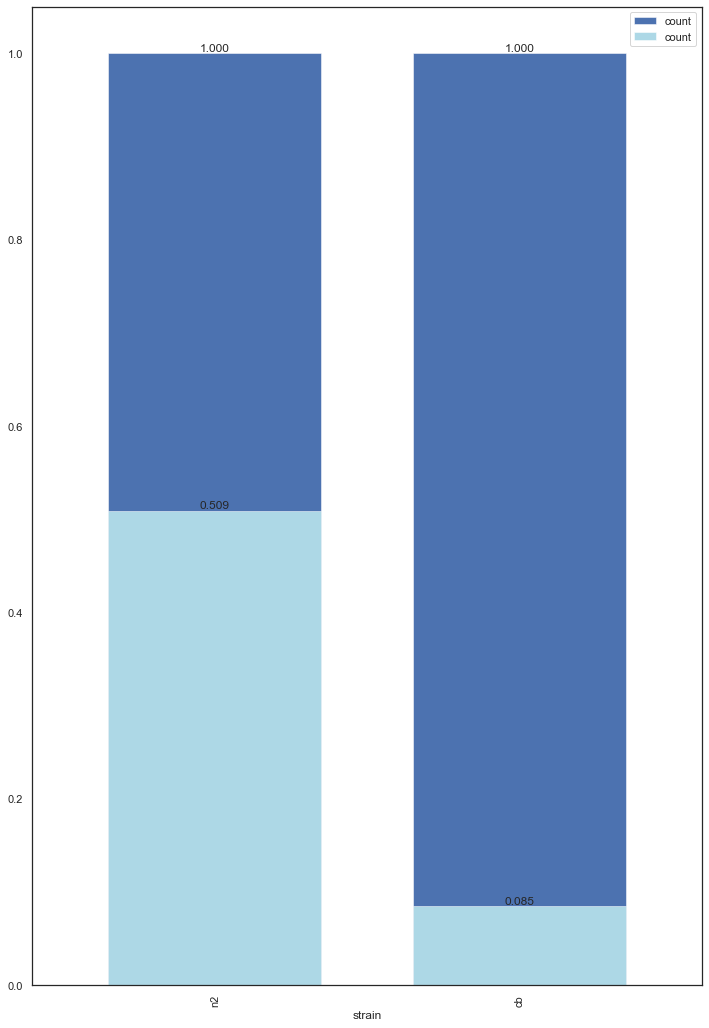

In [68]:
sns.set(style="white")
fig, ax = plt.subplots(figsize = (12, 18))
retro_stacked = percent_w_snps_df[percent_w_snps_df['type'] == 'all'].plot(kind = 'bar',
                                       ax = ax, 
                                       x = 'strain',
                                       edgecolor = 'white', 
                                       linewidth = .5, 
                                       width = .7)
retro_stacked = percent_w_snps_df[percent_w_snps_df['type'] == 'small'].plot(kind = 'bar',
                                       ax = ax, 
                                       color = 'lightblue',
                                       x = 'strain',
                                       edgecolor = 'white', 
                                       linewidth = .5, 
                                       width = .7)

# ax.set(ylim = (0, 20000))
for i in ax.containers:
        ax.bar_label(i, fmt='%.3f', label_type = 'edge')
        
# plt.savefig(f'num_with_snps.pdf', dpi=300, facecolor = 'w', edgecolor = 'w', format='pdf', bbox_inches='tight')

## venn diagram

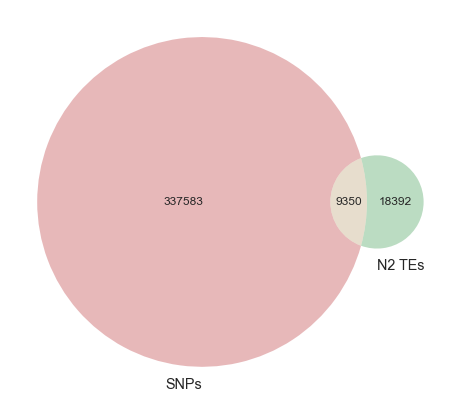

In [30]:
fig, ax = plt.subplots(figsize = (8, 8))

venn2(subsets = (337583, 18392, 9350), set_labels = ('SNPs', 'N2 TEs'), ax=ax)

# plt.savefig('tes_w_snps_venn_filter2.pdf', dpi=300, facecolor = 'w', edgecolor = 'w', format='pdf', bbox_inches='tight')

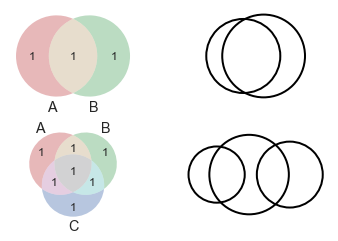

In [34]:
figure, axes = plt.subplots(2, 2)
venn2(subsets={'10': 1, '01': 1, '11': 1}, set_labels = ('A', 'B'), ax=axes[0][0])
venn2_circles((1, 2, 3), ax=axes[0][1])
venn3(subsets=(1, 1, 1, 1, 1, 1, 1), set_labels = ('A', 'B', 'C'), ax=axes[1][0])
venn3_circles({'001': 10, '100': 20, '010': 21, '110': 13, '011': 14}, ax=axes[1][1])
plt.show()



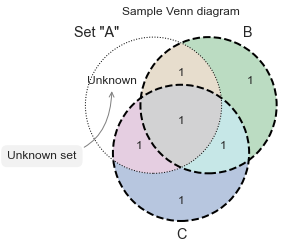

In [39]:
plt.figure(figsize=(4,4))
v = venn3(subsets=(1, 1, 1, 1, 1, 1, 1), set_labels = ('A', 'B', 'C'))
v.get_patch_by_id('100').set_alpha(1.0)
v.get_patch_by_id('100').set_color('white')
v.get_label_by_id('100').set_text('Unknown')
v.get_label_by_id('A').set_text('Set "A"')
c = venn3_circles(subsets=(1, 1, 1, 1, 1, 1, 1), linestyle='dashed')
c[0].set_lw(1.0)
c[0].set_ls('dotted')
plt.title("Sample Venn diagram")
plt.annotate('Unknown set', xy=v.get_label_by_id('100').get_position() - np.array([0, 0.05]), xytext=(-70,-70),
             ha='center', textcoords='offset points', bbox=dict(boxstyle='round,pad=0.5', fc='gray', alpha=0.1),
             arrowprops=dict(arrowstyle='->', connectionstyle='arc3,rad=0.5',color='gray'))
plt.show()
